# Regresión Linear Simple
Los modelos de regresión lineal son un buen punto de partida
para conocer los modelos de clasificación supervisada.

- Se modelan muy rápidamente
- Son muy interpretables.


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


Un ajuste en línea recta es un modelo de la forma

$$
y = ax + b
$$
donde $a$ *pendiente* (grado de inclinación de una línea), y $b$ es conocido como el *intercepto* (lugar en el que se cruza con un eje).

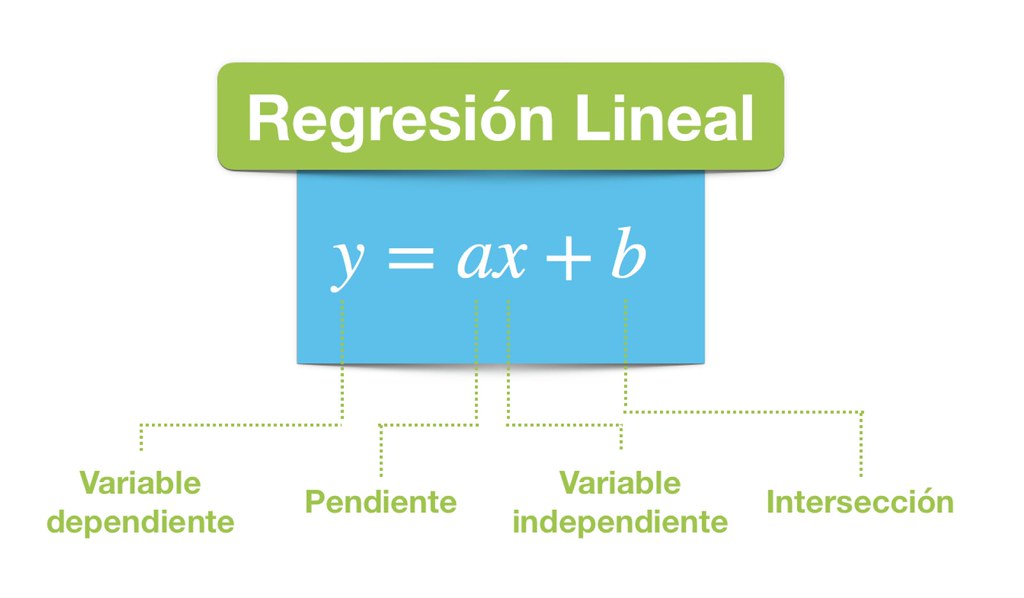


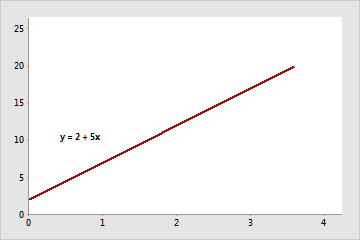

In [ ]:
# Contenedor para el generador de números pseudoaleatorios
rng = np.random.RandomState(1)
type(rng)

numpy.random.mtrand.RandomState

In [ ]:
x = 10 * rng.rand(50)
x

array([2.48033558, 8.51671875, 4.15848718, 6.16685067, 2.33666139,
       1.01967259, 5.15857017, 4.77140987, 1.52671644, 6.21806232,
       5.44010119, 6.54137347, 1.4454554 , 7.51527817, 2.2204914 ,
       5.19351824, 7.85296028, 0.22330428, 3.2436246 , 8.72922376,
       8.44709608, 5.38440593, 8.66608274, 9.49805991, 8.26406998,
       8.54115444, 0.98743402, 6.51304332, 7.03516988, 6.10240813,
       7.99615262, 0.3457122 , 7.70238735, 7.31728601, 2.59698393,
       2.57069299, 6.32303317, 3.45297462, 7.96588678, 4.46146232,
       7.82749415, 9.90471784, 3.0024834 , 1.43005828, 9.01308436,
       5.41559379, 9.74740371, 6.366044  , 9.93913025, 5.46070804])

In [ ]:
2 * x + 5 + rng.randn(50)

array([ 7.45423051, 19.91927358, 12.9053352 , 18.61222943,  9.23109351,
        7.36287254, 15.20714885, 14.55136869,  7.88523404, 17.26194429,
       16.34136648, 16.90676427,  8.90103798, 20.95057428,  9.24592546,
       16.19242991, 20.00457614,  4.90938554, 11.64351304, 22.2682265 ,
       21.44545412, 15.09636381, 21.77467076, 24.93528857, 19.58481655,
       22.43480324,  6.73843108, 18.75390015, 19.58541338, 14.42228179,
       21.57695185,  6.01569864, 20.42663753, 19.1658982 , 11.04724909,
        9.72835667, 19.48078398, 12.47033209, 23.06960163, 13.13739064,
       18.89906266, 25.52422527, 11.85767085,  7.89547666, 21.48737548,
       15.38329239, 25.11279295, 17.54791167, 24.76227531, 15.74595711])

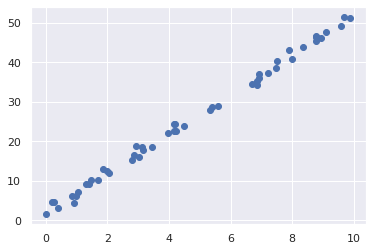

In [ ]:
from seaborn.categorical import barplot
rng = np.random.RandomState(1)

# y = ax + b
b = 2 # intercepto
a = 5 # pendiente
ruido = rng.randn(50)
y = x * a + b + ruido
plt.scatter(x, y);

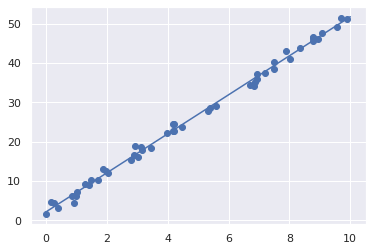

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

# np.newaxis
# utiliza para indexar matrices en Python
# Agrega una nueva dimensión a un array NumPy en Python.
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [ ]:
print("Pendiente del modelo:    ", model.coef_[0])
print("Interepto del modelo:", model.intercept_)

Pendiente del modelo:     4.9707404294879955
Interepto del modelo: 2.11112020684147


In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# from sklearn.cross_validation import train_test_split
import numpy as np

%matplotlib inline

In [ ]:
path = 'https://raw.githubusercontent.com/ritikaradhakrishnan/Machine-Learning-with-Python---Basics-and-Algorithms/master/advertising.csv'
df = pd.read_csv(path)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# estadisticos básicos
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

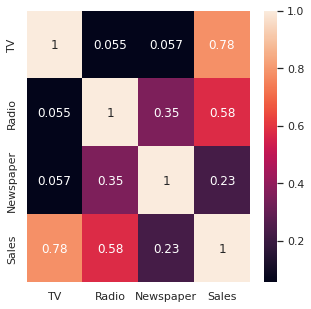

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(),annot = True)

In [ ]:
# Creando atributos
x = df[['TV','Radio','Newspaper']]

# Creando etiqueta o variable dependiente, target
y = df['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7 , random_state=100)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
# Entrenamos nuestro modelo
lm.fit(x_train,y_train)

LinearRegression()

# Evaluación del modelo

In [ ]:
print(lm.intercept_)

2.652789668879498


In [ ]:
coeff_df = pd.DataFrame(lm.coef_, x_test.columns,columns=['coeficientes'])
coeff_df

,coeficientes
TV,0.045426
Radio,0.189758
Newspaper,0.004603


Si incrementamos la inversión en TV en una unidad, las ventas se incrementarán en 0.45

In [ ]:
y_pred = lm.predict(x_test)
y_pred

array([10.62160072, 20.00625302, 16.91850882, 19.17040746, 20.94974131,
       13.12284284, 11.80740696, 12.32019766, 20.57806782, 20.95662688,
       10.79096475, 19.54868702,  6.42403866, 15.23133391,  8.97226257,
        7.89897862, 16.23599497, 12.02636477, 17.09702178, 11.26080277,
       16.97826292,  9.75655721, 20.82389762, 17.20916742, 15.13816239,
       21.97290698, 19.20181841, 10.07501899, 19.39017185, 14.8673761 ,
       14.36798893,  7.55604543,  9.96742165, 14.76342565,  7.20995576,
       13.60003295,  7.49088656, 11.70865932, 13.46091883, 15.2229793 ,
       17.18088277, 13.56738329, 14.30942267, 13.72909849, 11.88559349,
        8.77039705, 12.1244102 , 19.20252289,  9.08376601,  5.15367352,
       16.22852749, 18.14111213, 12.94835466, 16.86274503, 17.86462435,
       12.33930625,  4.3575739 , 11.25904494, 16.11560622, 13.56602169])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [ ]:
# Error cuadratico medio
# Mide el promedio de los errores al cuadrado
# el valor predicho - valor real

### ¿QUÉ ES EL R-CUADRADO?
El R-cuadrado es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como coeficiente de determinación, o coeficiente de determinación múltiple si se trata de regresión múltiple.

R-cuadrado = Variación explicada / variación total

El R-cuadrado siempre está entre 0 y 100%:

- 0% indica que el modelo no explica ninguna porción de la variabilidad de los datos de respuesta en torno a su media.
- 100% indica que el modelo explica toda la variabilidad de los datos de respuesta en torno a su media.

En general, cuanto mayor es el R-cuadrado, mejor se ajusta el modelo a los datos. Sin embargo, hay condiciones importantes con respecto a esta pauta de las que hablaré más adelante.

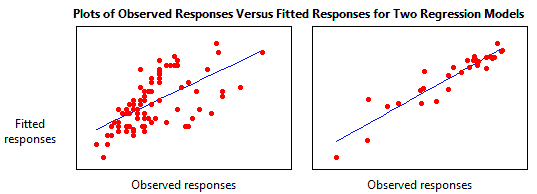

l modelo de regresión de la izquierda explica el 38% de la varianza, mientras que el de la derecha explica el 87,4%. Cuanto mayor sea la varianza explicada por el modelo de regresión, más cerca estarán los puntos de los datos de la línea de regresión ajustada. En teoría, si un modelo pudiera explicar el 100% de la varianza, los valores ajustados siempre serían iguales a los valores observados y, por lo tanto, todos los puntos de los datos estarían sobre la línea de regresión ajustada.

In [ ]:
# print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

r_square_value : 0.9058622107532246
